## Домашнее задание №5

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями.
2. Добавьте первые разности по стоимости доллара и евро к рублю.
3. Сделайте ее перерасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).
5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

#### 1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
Path_Brent = 'my_BRENT2019.csv'
data_brent = pd.read_csv(Path_Brent, index_col=[0], parse_dates=[0])

data_brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


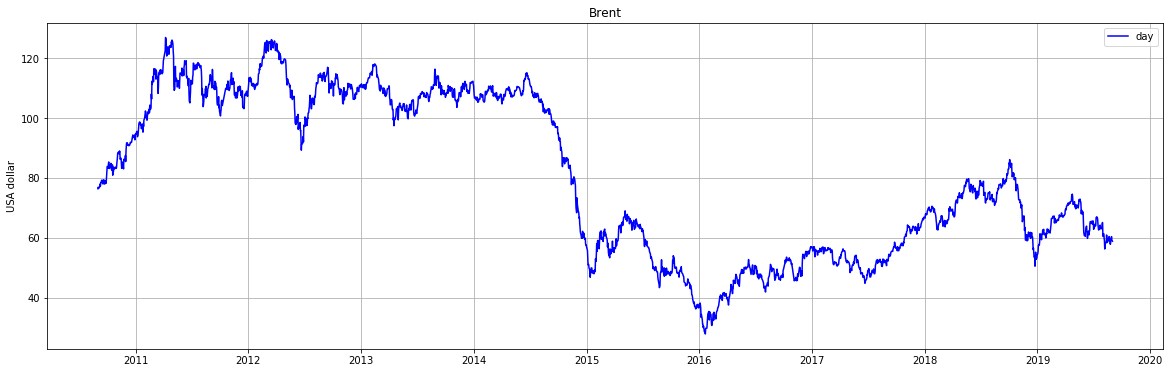

In [3]:
plt.figure(figsize =(20,6))
plt.plot(data_brent['Значение'], 'b', label ='day')

plt.ylabel('USA dollar')
plt.title('Brent')
plt.legend()
plt.grid()
plt.show();

Помним, что наиболее интересным для и интерпретируемым у этого ряда является поведение его первых разностей. Построим их.

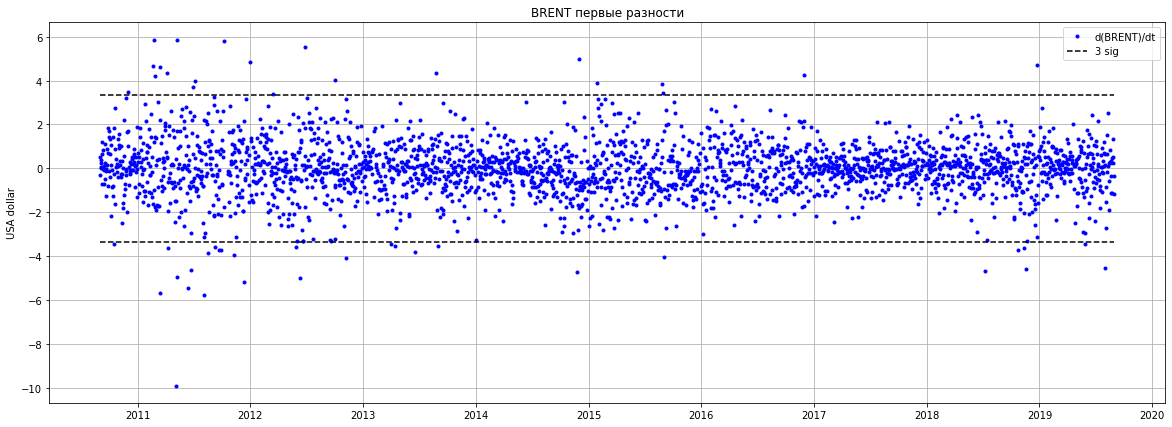

In [4]:
d_brent_data = data_brent['Значение'].values[1:] - data_brent['Значение'].values[:-1]
s_brent = np.std(d_brent_data)**0.5 *3

plt.figure(figsize=(20, 7))
plt.plot(data_brent.iloc[:-1].index, d_brent_data, '.b', label='d(BRENT)/dt')
plt.plot(data_brent.iloc[[0,-1]].index,[s_brent, s_brent], '--k', label ='3 sig')
plt.plot(data_brent.iloc[[0,-1]].index,[-s_brent, -s_brent], '--k')

plt.ylabel('USA dollar')
plt.title('BRENT первые разности')
plt.legend()
plt.grid()
plt.show();

#### 2. Добавьте первые разности по стоимости доллара и евро к рублю.

In [5]:
rub_doll = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [6]:
### К сожалению, не удалось скачать данные с сайта ЦБ.

#rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
#rub_e.index = pd.to_datetime(rub_e['data'].values).date
#rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
#rub_e.head()

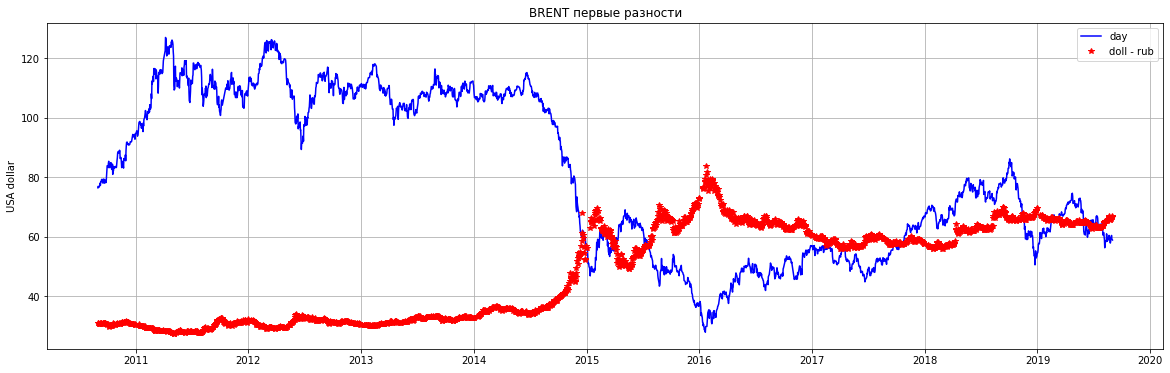

In [7]:
plt.figure(figsize =(20,6))
plt.plot(data_brent['Значение'], 'b', label ='day')

plt.plot(rub_doll.index,rub_doll['curs'].values,'*r', label='doll - rub')
#plt.plot(rub_e.index,rub_e['curs'].values,'*r', label='euro - rub')

plt.ylabel('USA dollar')
plt.title('BRENT первые разности')
plt.legend()
plt.grid()
plt.show();

Посмотрим на первые разности. Помним, что для BRENT первые разности стационарны. Проверим как выглядят они для кросс-курсов.

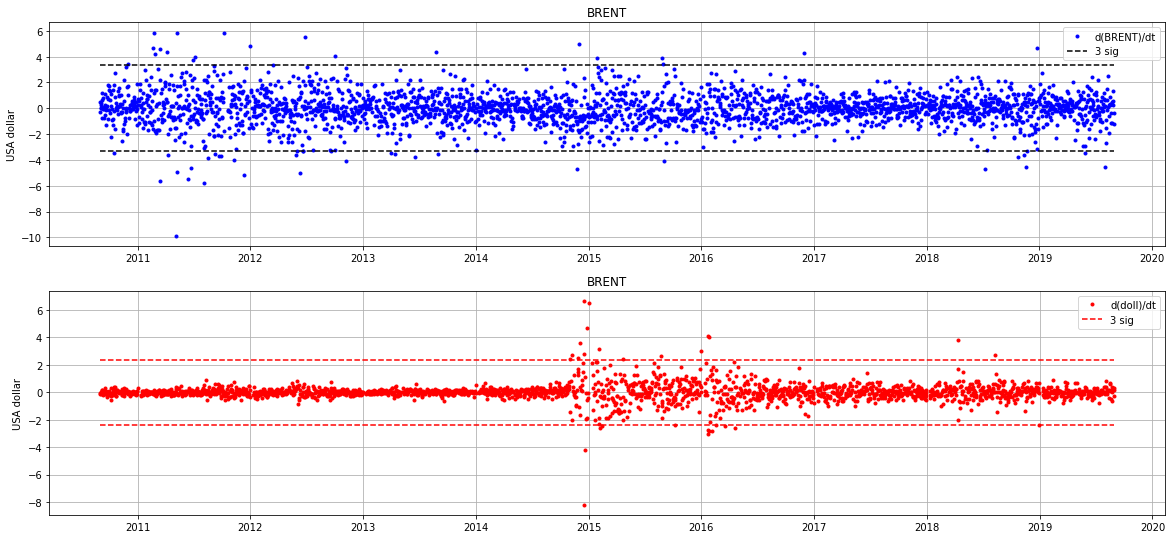

In [8]:
d_rub_doll = rub_doll['curs'].values[1:] - rub_doll['curs'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

#d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]
#s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20, 14))
plt.subplot(3,1,1)
plt.plot(data_brent.iloc[:-1].index, d_brent_data, '.b', label='d(BRENT)/dt')
plt.plot(data_brent.iloc[[0,-1]].index, [s_brent, s_brent], '--k', label ='3 sig')
plt.plot(data_brent.iloc[[0,-1]].index, [-s_brent, -s_brent], '--k')
plt.ylabel('USA dollar')
plt.title('BRENT')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(rub_doll.iloc[:-1].index, d_rub_doll, '.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index, [s_rub, s_rub], '--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index, [-s_rub, -s_rub], '--r')
plt.ylabel('USA dollar')
plt.title('BRENT')
plt.legend()
plt.grid()
plt.show()

#plt.subplot(3,1,3)
#plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
#plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
#plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]
ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
#ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]

In [9]:
data_brent['doll']=0
data_brent['doll'].values[1:2229]=rub_doll['curs'].values[:]
data_brent=data_brent.iloc[:2229,:]

In [10]:
data_brent.iloc[100:115,:]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2010-12-27,93.71,2010,12,27,4,361,52,0,0,0,0,29
2010-12-28,94.21,2010,12,28,4,362,52,1,0,0,0,29
2010-12-29,94.03,2010,12,29,4,363,52,2,0,0,0,29
2010-12-30,92.71,2010,12,30,4,364,52,3,0,1,0,29
2010-12-31,94.59,2010,12,31,4,365,52,4,1,0,0,29
2011-01-02,94.56,2011,1,2,1,2,52,6,0,0,0,29
2011-01-03,94.85,2011,1,3,1,3,1,0,0,0,0,29
2011-01-05,95.54,2011,1,5,1,5,1,2,0,0,0,29
2011-01-06,94.43,2011,1,6,1,6,1,3,0,0,0,29


#### 3. Сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [11]:
data_brent_W = data_brent.resample('W').mean()
data_brent_W.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,24.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667,30.000000
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000,30.500000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000,30.166667
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000,29.666667


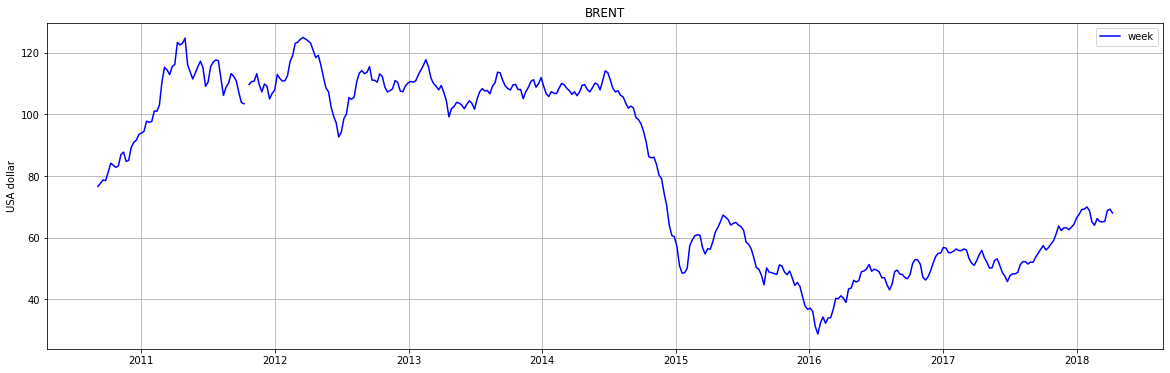

In [12]:
plt.figure(figsize =(20,6))
plt.plot(data_brent_W.index, data_brent_W['Значение'], 'b', label ='week')

plt.ylabel('USA dollar')
plt.title('BRENT')
plt.legend()
plt.grid()
plt.show()

Обработка пропущенных значений.

In [13]:
data_brent_W_0 = data_brent_W.loc[data_brent_W['Значение'].isnull(), :].index
data_brent_W.loc[data_brent_W_0, :]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_brent_W = data_brent_W.dropna(axis='index', how='any', subset=['Значение'])

#### 4. Постройте модель предсказания 1-й точки от текущей (h=1).

In [15]:
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
train, test = split_data(data_brent_W, '01-09-2017')

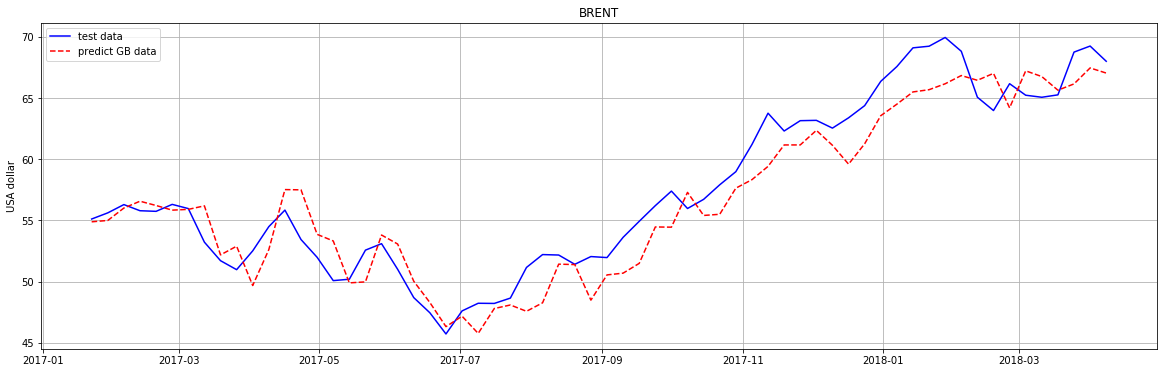

ошибка градиентного бустинга :   3.2595045102939437 %


In [17]:
h = 1

X_train = train.iloc[:-h,:]
y_train = train['Значение'].values[h:]
X_test = test.iloc[:-h,:]
y_test = test['Значение'].values[h:]

model_gb_1 = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_gb_1.fit(X_train, y_train) 
y_test_pred_gb = model_gb_1.predict(X_test)

plt.figure(figsize=(20, 6))

plt.plot(test.index[h:], y_test, 'b', label='test data')
plt.plot(test.index[h:], y_test_pred_gb, '--r', label='predict GB data')

plt.ylabel('USA dollar')
plt.title('BRENT')
plt.legend()
plt.grid()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

#### 5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [18]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [19]:
model_l.fit( X_train, y_train ) 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
X_test.shape

(64, 12)

In [21]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

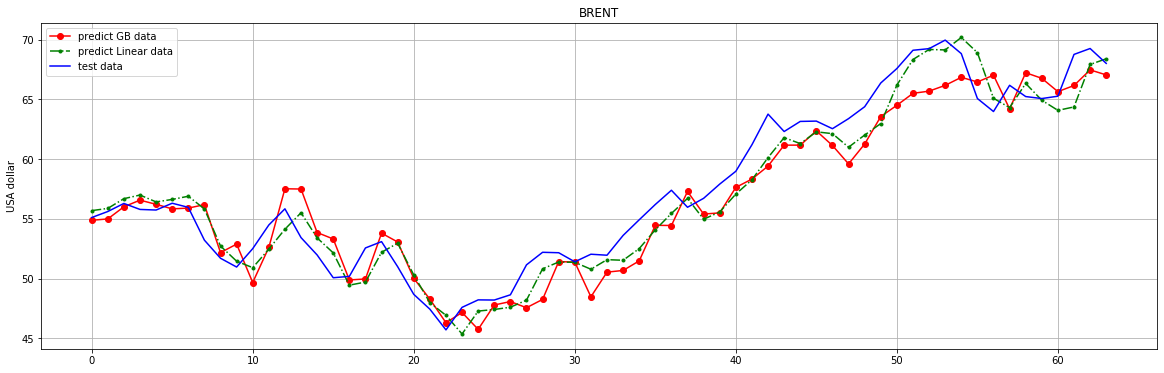

In [22]:
plt.figure(figsize=(20, 6))

plt.plot(y_test_pred_g[:100], '-or', label='predict GB data' )
plt.plot(y_test_pred_l[:100], '-..g', label='predict Linear data' )
plt.plot(y_test[:100], 'b', label='test data')

plt.ylabel('USA dollar')
plt.title('BRENT')
plt.legend()
plt.grid()
plt.show()

y_pred_g = model_g.predict(X_train) y_pred_l= model_l.predict(X_train)

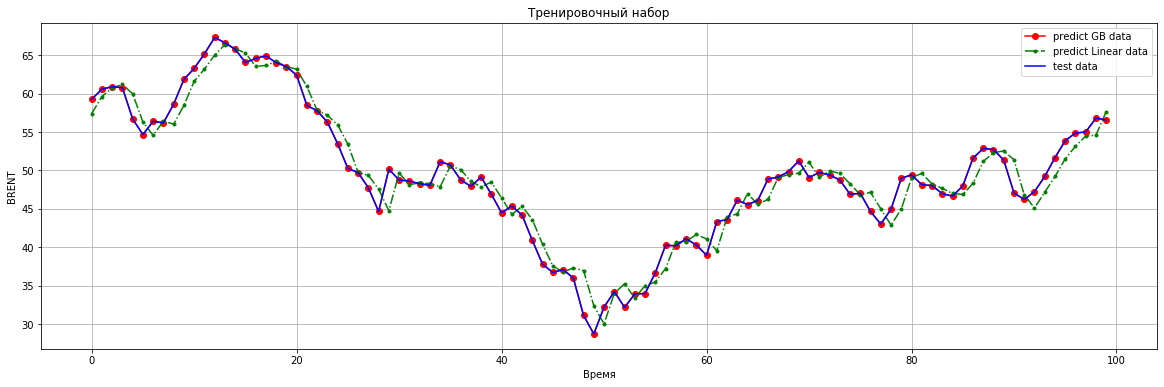

In [23]:
plt.figure(figsize=(20, 6))

plt.plot(y_pred_g[-100:],'-or', label='predict GB data' )
plt.plot(y_pred_l[-100:], '-..g', label='predict Linear data' )
plt.plot(y_train[-100:], 'b', label='test data')

plt.title('Тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.legend()
plt.grid()
plt.show()

Линейная модель практически не работает, т.к. видно запаздывание в размере h. Градиентный бустинг практически не отличается от нее на интервале обучения. 

## Заключение

Прогнозирование на основе обучения позволяет эффективно описывать достаточно сложные данные. Построение прогноза на основе генерации регрессионных моделей позволит построить хороший ответ даже не зная как устроен ряд и каковы его статистические свойства. При решении задачи прогнозирования следует учитывать следующие особенности этого подхода:
- Строим много признаков.
- Обрабатываем признаки и используем результаты статистического анализа ряда для придумывания новых признаков.
- Строим много моделей и не забываем, что тестирование моделей идет только на последних точках ряда.
- Используем правильные метрики.
- Следим за аномалиями
